In [1]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

     |████████████████████████████████| 1.1 MB 4.1 MB/s 
     |████████████████████████████████| 462 kB 51.6 MB/s 


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from tcn import TCN, tcn_full_summary

In [3]:
df=pd.read_csv("AMZN.csv")
print("Number of rows and columns:", df.shape)
df.head(5)
training_set = df.iloc[:1100, 4:5].values

test_set = df.iloc[1100:, 4:5].values
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Number of rows and columns: (1503, 7)


DATA WINDOW 60

In [4]:

X_train60 = []
y_train60 = []
for i in range(60, 1100):
    X_train60.append(training_set_scaled[i-60:i, 0])
    y_train60.append(training_set_scaled[i, 0])
X_train60, y_train60 = np.array(X_train60), np.array(y_train60)
X_train60 = np.reshape(X_train60, (X_train60.shape[0], X_train60.shape[1], 1))

X_train60.shape

(1040, 60, 1)

TEST DATA WINDOW 60

In [5]:

dataset_train = df.iloc[:1100, 1:2]
dataset_test = df.iloc[1100:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)


463

In [6]:
X_test60 = []
for i in range(60, 463):
    X_test60.append(inputs[i-60:i, 0])
X_test60 = np.array(X_test60)
X_test60 = np.reshape(X_test60, (X_test60.shape[0], X_test60.shape[1], 1))
X_test60.shape

(403, 60, 1)

DATA WINDOW 1

In [7]:

X_train1 = []
y_train1 = []
for i in range(1, 1100):
    X_train1.append(training_set_scaled[i-1:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_train1.shape

(1099, 1, 1)

TEST DATA WINDOW 1

In [8]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

404

In [9]:

X_test1 = []
for i in range(1, 404):
    X_test1.append(inputs[i-1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
print(X_test1.shape)

(403, 1, 1)


DATA WINDOW 30

In [10]:

X_train30 = []
y_train30 = []
for i in range(30, 1100):
    X_train30.append(training_set_scaled[i-30:i, 0])
    y_train30.append(training_set_scaled[i, 0])
X_train30, y_train30 = np.array(X_train30), np.array(y_train30)
X_train30 = np.reshape(X_train30, (X_train30.shape[0], X_train30.shape[1], 1))
X_train30.shape

(1070, 30, 1)

TEST DATA WINDOW 30

In [11]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

433

In [12]:

X_test30 = []
for i in range(30, 433):
    X_test30.append(inputs[i-30:i, 0])
X_test30 = np.array(X_test30)
X_test30 = np.reshape(X_test30, (X_test30.shape[0], X_test30.shape[1], 1))
print(X_test30.shape)

(403, 30, 1)


DATA WINDOW 90

In [13]:

X_train90 = []
y_train90 = []
for i in range(90, 1100):
    X_train90.append(training_set_scaled[i-90:i, 0])
    y_train90.append(training_set_scaled[i, 0])
X_train90, y_train90 = np.array(X_train90), np.array(y_train90)
X_train90 = np.reshape(X_train90, (X_train90.shape[0], X_train90.shape[1], 1))
X_train90.shape

(1010, 90, 1)

TEST DATA WINDOW 90

In [14]:

dataset_train = df.iloc[:1100, 4:5]
dataset_test = df.iloc[1100:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

493

In [15]:

X_test90 = []
for i in range(90, 493):
    X_test90.append(inputs[i-90:i, 0])
X_test90 = np.array(X_test90)
X_test90 = np.reshape(X_test90, (X_test90.shape[0], X_test90.shape[1], 1))
print(X_test90.shape)

(403, 90, 1)


GRU 1

In [16]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 30, batch_size = 32)

Epoch 1/30
35/35 [==============================] - 9s 7ms/step - loss: 0.0702
Epoch 2/30
35/35 [==============================] - 0s 7ms/step - loss: 0.0110
Epoch 3/30
35/35 [==============================] - 0s 7ms/step - loss: 8.6300e-04
Epoch 4/30
35/35 [==============================] - 0s 6ms/step - loss: 2.6093e-04
Epoch 5/30
35/35 [==============================] - 0s 6ms/step - loss: 2.5625e-04
Epoch 6/30
35/35 [==============================] - 0s 5ms/step - loss: 2.3920e-04
Epoch 7/30
35/35 [==============================] - 0s 5ms/step - loss: 2.4481e-04
Epoch 8/30
35/35 [==============================] - 0s 5ms/step - loss: 2.5756e-04
Epoch 9/30
35/35 [==============================] - 0s 6ms/step - loss: 2.7251e-04
Epoch 10/30
35/35 [==============================] - 0s 5ms/step - loss: 2.5146e-04
Epoch 11/30
35/35 [==============================] - 0s 5ms/step - loss: 2.5114e-04
Epoch 12/30
35/35 [==============================] - 0s 6ms/step - loss: 2.5423e-04
Epoch 13/

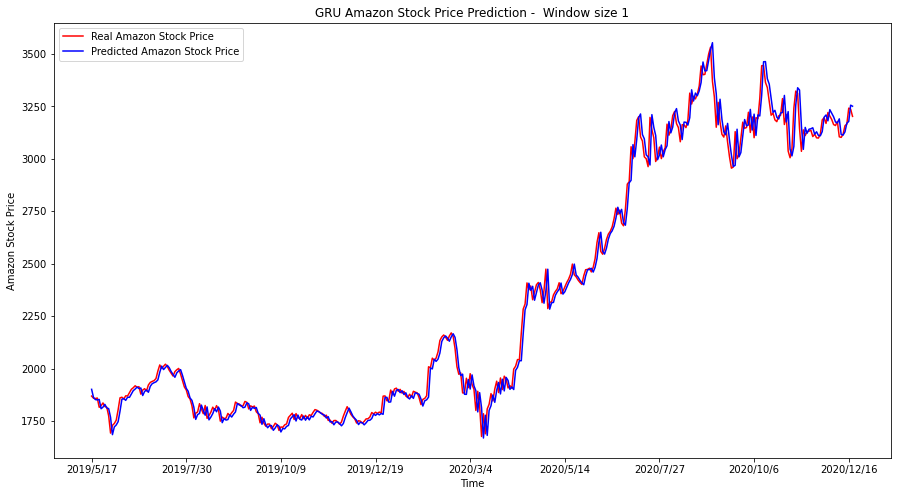

In [17]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Amazon Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [18]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

36.74333550885934

In [19]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))

rmse

52.83741874551837

TCN 1

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train1.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train1, y_train1, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 9s 9ms/step - loss: 0.0528
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0110
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 6/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 8/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0020
Epoch 9/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 10/100
35/35 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 11/100
35/35 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 12/100
35/35 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 13/100
35/35 [============

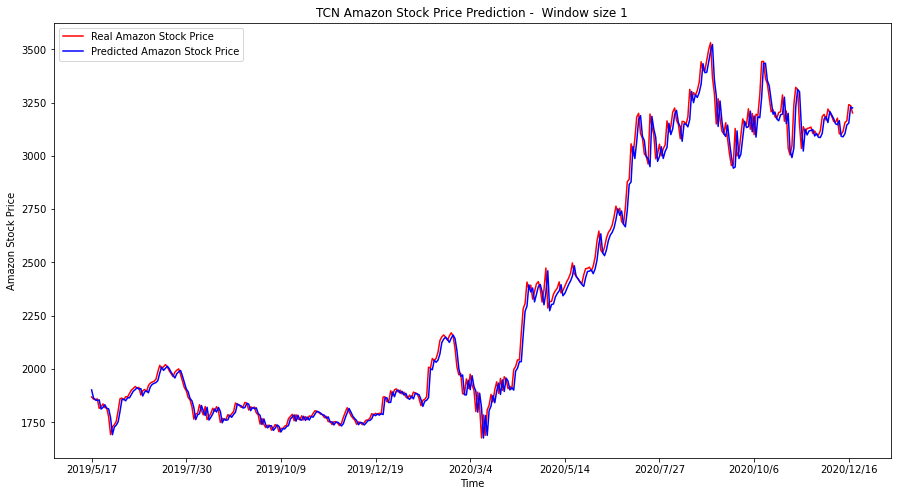

In [ ]:
predicted_stock_price = model.predict(X_test1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Amazon Stock Price Prediction -  Window size 1')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

36.882425095572266

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

53.161084839221104

GRU 30

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train30.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 30, batch_size = 32)

Epoch 1/30
34/34 [==============================] - 2s 8ms/step - loss: 0.0191
Epoch 2/30
34/34 [==============================] - 0s 8ms/step - loss: 4.8199e-04
Epoch 3/30
34/34 [==============================] - 0s 8ms/step - loss: 3.4815e-04
Epoch 4/30
34/34 [==============================] - 0s 8ms/step - loss: 4.3185e-04
Epoch 5/30
34/34 [==============================] - 0s 8ms/step - loss: 4.0486e-04
Epoch 6/30
34/34 [==============================] - 0s 8ms/step - loss: 3.8225e-04
Epoch 7/30
34/34 [==============================] - 0s 8ms/step - loss: 3.6202e-04
Epoch 8/30
34/34 [==============================] - 0s 8ms/step - loss: 3.8741e-04
Epoch 9/30
34/34 [==============================] - 0s 8ms/step - loss: 4.9465e-04
Epoch 10/30
34/34 [==============================] - 0s 8ms/step - loss: 4.4033e-04
Epoch 11/30
34/34 [==============================] - 0s 7ms/step - loss: 3.6207e-04
Epoch 12/30
34/34 [==============================] - 0s 8ms/step - loss: 3.9734e-04
Epoch

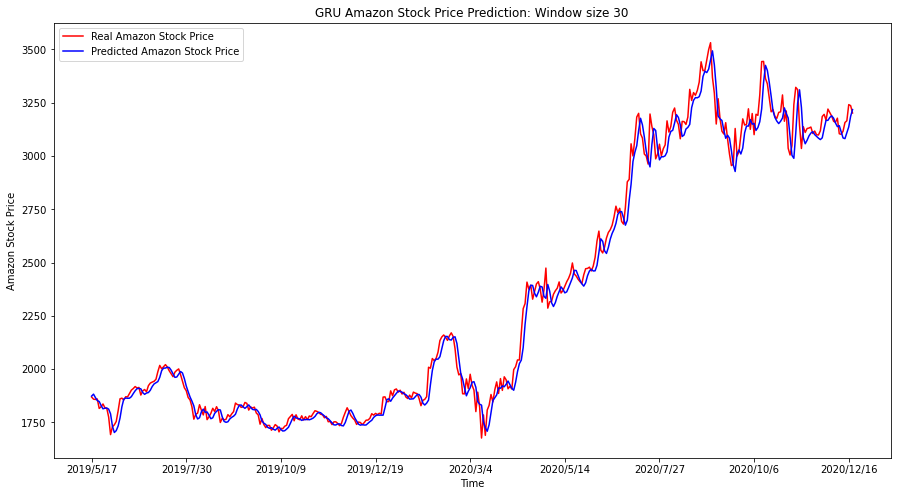

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Amazon Stock Price Prediction: Window size 30')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

41.334431456827694

In [ ]:
rmse=math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

59.62429253302063

TCN 30

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train30.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train30, y_train30, epochs = 100, batch_size = 32)

Epoch 1/100
34/34 [==============================] - 2s 9ms/step - loss: 2.7240
Epoch 2/100
34/34 [==============================] - 0s 8ms/step - loss: 0.1782
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 0.1356
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0886
Epoch 5/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0701
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0611
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0563
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0429
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0396
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 0.0396
Epoch 11/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0270
Epoch 12/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0259
Epoch 13/100
34/34 [=================

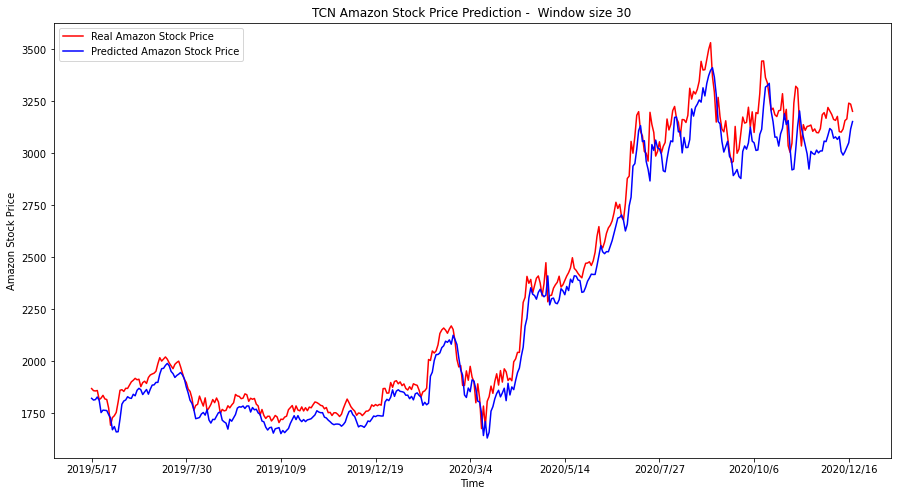

In [ ]:
predicted_stock_price = model.predict(X_test30)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Amazon Stock Price Prediction -  Window size 30')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

75.38704072154157

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

92.63000078307175

GRU 60

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train60.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 30, batch_size = 32)

Epoch 1/30
33/33 [==============================] - 2s 13ms/step - loss: 0.0183
Epoch 2/30
33/33 [==============================] - 0s 13ms/step - loss: 5.6864e-04
Epoch 3/30
33/33 [==============================] - 0s 13ms/step - loss: 3.9460e-04
Epoch 4/30
33/33 [==============================] - 0s 13ms/step - loss: 3.9484e-04
Epoch 5/30
33/33 [==============================] - 0s 13ms/step - loss: 3.5336e-04
Epoch 6/30
33/33 [==============================] - 0s 12ms/step - loss: 3.5133e-04
Epoch 7/30
33/33 [==============================] - 0s 13ms/step - loss: 3.7102e-04
Epoch 8/30
33/33 [==============================] - 0s 13ms/step - loss: 3.6956e-04
Epoch 9/30
33/33 [==============================] - 0s 13ms/step - loss: 3.5087e-04
Epoch 10/30
33/33 [==============================] - 0s 13ms/step - loss: 3.8007e-04
Epoch 11/30
33/33 [==============================] - 0s 13ms/step - loss: 3.6633e-04
Epoch 12/30
33/33 [==============================] - 0s 13ms/step - loss: 3.47

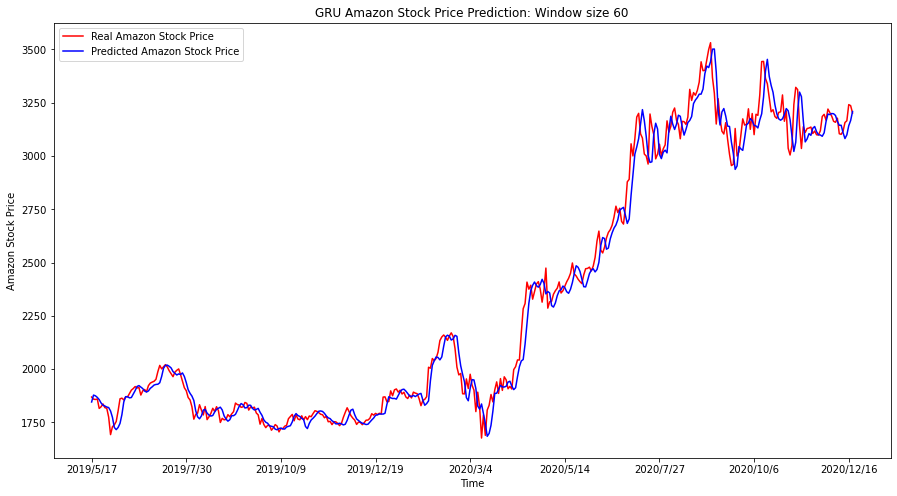

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Amazon Stock Price Prediction: Window size 60')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

49.33590265574597

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price, y))
rmse

70.74606823693162

TCN 60

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train60.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train60, y_train60, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 2s 9ms/step - loss: 1.6647
Epoch 2/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0896
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0507
Epoch 4/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0367
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0298
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0316
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0209
Epoch 8/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0186
Epoch 9/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 10/100
33/33 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 11/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0152
Epoch 12/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0133
Epoch 13/100
33/33 [=================

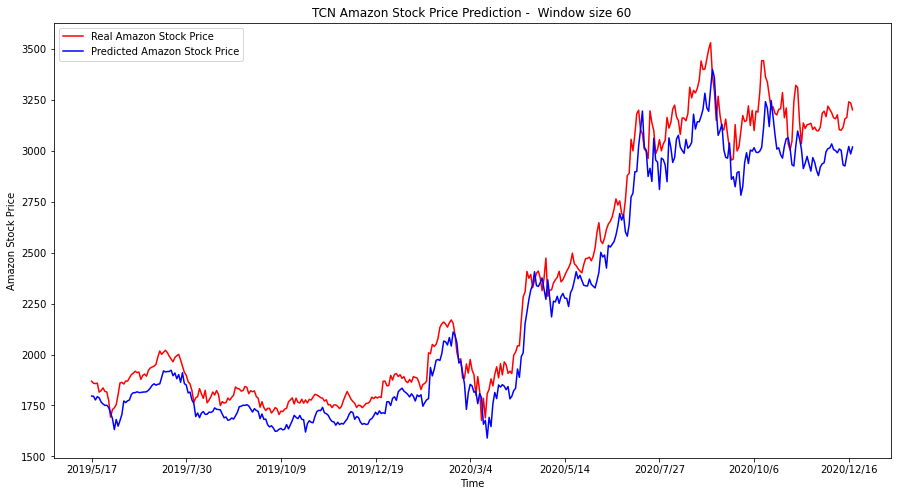

In [ ]:
predicted_stock_price = model.predict(X_test60)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Amazon Stock Price Prediction -  Window size 60')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price,y)
abse

115.58690617162299

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

135.3824676642003

GRU 90

In [ ]:
model = Sequential()
model.add(GRU(units = 700, input_shape = (X_train90.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 30, batch_size = 32)

Epoch 1/30
32/32 [==============================] - 2s 18ms/step - loss: 0.0242
Epoch 2/30
32/32 [==============================] - 1s 23ms/step - loss: 6.7601e-04
Epoch 3/30
32/32 [==============================] - 1s 20ms/step - loss: 4.6707e-04
Epoch 4/30
32/32 [==============================] - 1s 18ms/step - loss: 4.2797e-04
Epoch 5/30
32/32 [==============================] - 1s 18ms/step - loss: 3.5640e-04
Epoch 6/30
32/32 [==============================] - 1s 18ms/step - loss: 3.9193e-04
Epoch 7/30
32/32 [==============================] - 1s 18ms/step - loss: 3.7446e-04
Epoch 8/30
32/32 [==============================] - 1s 18ms/step - loss: 3.9957e-04
Epoch 9/30
32/32 [==============================] - 1s 18ms/step - loss: 4.0832e-04
Epoch 10/30
32/32 [==============================] - 1s 18ms/step - loss: 3.6848e-04
Epoch 11/30
32/32 [==============================] - 1s 18ms/step - loss: 3.6476e-04
Epoch 12/30
32/32 [==============================] - 1s 20ms/step - loss: 4.03

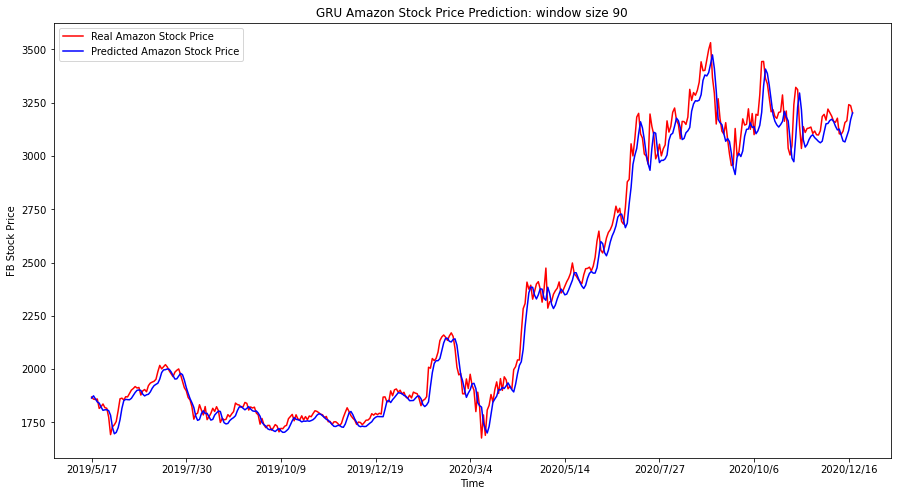

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('GRU Amazon Stock Price Prediction: window size 90')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

45.50796001298852

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

64.02994944723794

TCN 90

In [ ]:
np.random.seed(1)
model = Sequential()
model.add(TCN(nb_filters=64, kernel_size=5, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (X_train90.shape[1], 1)))
#model.add(Dropout(0.1))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train90, y_train90, epochs = 100, batch_size = 32)

Epoch 1/100
32/32 [==============================] - 2s 11ms/step - loss: 15.7446
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.2561
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1330
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 0.1035
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0756
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0522
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0353
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0371
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 11/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 12/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 13/100
32/32 [===============

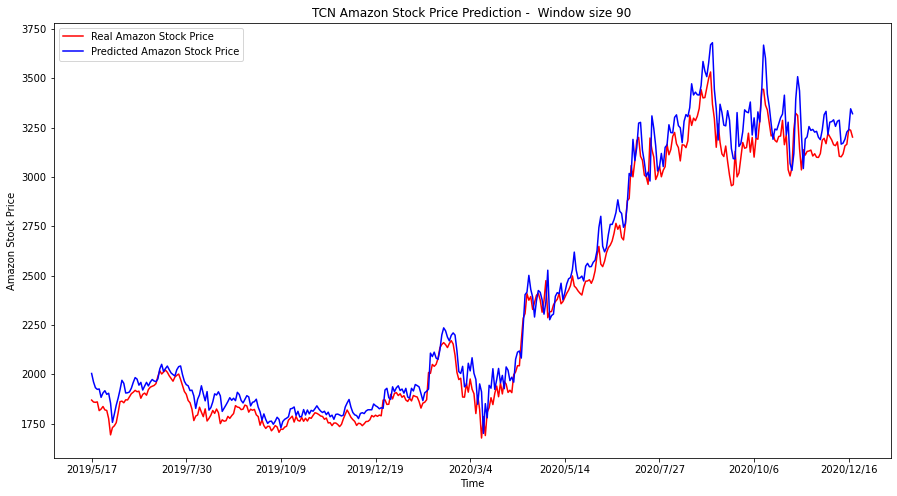

In [ ]:
predicted_stock_price = model.predict(X_test90)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(403,) 
x = df.loc[1100: , "Date"] 
# Visualising the results
plt.figure(figsize = (15,8))
plt.plot(x, y, c= "red", label = "Real Amazon Stock Price")
plt.plot(df.loc[1100:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Amazon Stock Price")
plt.xticks(np.arange(0,403,50))
plt.title('TCN Amazon Stock Price Prediction -  Window size 90')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(predicted_stock_price, y)
abse

73.82594593833359

In [ ]:
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
rmse

93.98098389706175